MovieWriter imagemagick unavailable; using Pillow instead.


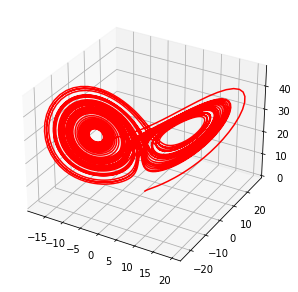

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure(figsize=(10, 5))
ax = fig.gca(projection='3d')

# const
DT = 0.01
STEP = 50


# function
def runge_kutta(xyz):
    k_1 = lorenz(xyz)
    k_2 = lorenz([x + k * DT / 2 for x, k in zip(xyz, k_1)])
    k_3 = lorenz([x + k * DT / 2 for x, k in zip(xyz, k_2)])
    k_4 = lorenz([x + k * DT for x, k in zip(xyz, k_3)])
    x_next = xyz + DT / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

    return x_next

def lorenz(xyz, p=10.0, r=28.0, b=8/3.0):
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]
    return np.array([
        -p * x + p * y,
        -x * z + r * x - y,
        x * y - b * z
    ])


t = 0
x = np.array([1, 1, 1])
data = np.r_[x]
ims = []
count = 0

while t < STEP:
    x = runge_kutta(x)
    t += DT
    data = np.c_[data, x]
    if count % 10 == 0:
        im = ax.plot(data[0, :count], data[1, :count], data[2, :count],
                     color='r')
        ims.append(im)
    count += 1

ani = animation.ArtistAnimation(fig, ims, interval=10)
ani.save('lorenz.gif', writer="imagemagick")
plt.show()